In [1]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [2]:
landmarks = pd.read_csv('new_output.csv',header=None)

In [3]:
landmarks[0].max()

12

In [4]:
landmarks.drop(columns=[4],inplace=True)

In [5]:
frame1 = landmarks.loc[landmarks[0]==10,1:3]

In [6]:
x_coords=frame1.iloc[:,0]
y_coords=frame1.iloc[:,1]
z_coords=frame1.iloc[:,2]

In [7]:
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers',
    marker=dict(size=5, color='blue'),
)])
fig.update_layout(
    title="3D Visualization of Mediapipe Landmarks",
    scene=dict(
        xaxis_title="X Coordinate",
        yaxis_title="Y Coordinate",
        zaxis_title="Z Coordinate",
        yaxis=dict(autorange='reversed')
    )
)

fig.show()

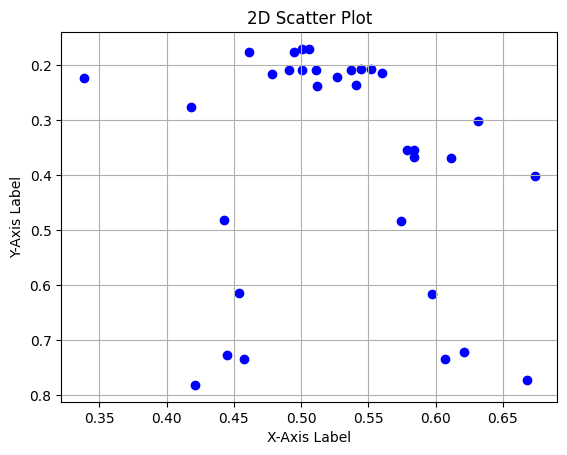

In [8]:
plt.scatter(x_coords, y_coords, color='blue', marker='o')

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('2D Scatter Plot')
plt.gca().invert_yaxis()

# Show the plot
plt.grid(True)
plt.show()

In [9]:
df=landmarks

In [10]:
import matplotlib
matplotlib.use('TkAgg')

In [11]:
df.rename(columns={0:'frame_number', 1:'x', 2:'y'}, inplace=True)

In [12]:
# MediaPipe Pose Landmarks and their corresponding body parts
connections = [
    (0, 1),  # nose -> left eye (inner)
    (0, 2),  # nose -> left eye
    (0, 3),  # nose -> left eye (outer)
    (0, 4),  # nose -> right eye (inner)
    (0, 5),  # nose -> right eye
    (0, 6),  # nose -> right eye (outer)
    (1, 2),  # left eye (inner) -> left eye
    (2, 3),  # left eye -> left eye (outer)
    (4, 5),  # right eye (inner) -> right eye
    (5, 6),  # right eye -> right eye (outer)
    (7, 8),  # left ear -> right ear
    (9, 10),  # mouth (left) -> mouth (right)
    (11, 12),  # left shoulder -> right shoulder
    (12, 13),  # right shoulder -> left elbow
    (13, 14),  # left elbow -> right elbow
    (14, 15),  # right elbow -> left wrist
    (11, 15),  # left shoulder -> left wrist
    (12, 16),  # right shoulder -> right wrist
    (15, 17),  # left wrist -> left pinky
    (15, 19),  # left wrist -> left index
    (15, 21),  # left wrist -> left thumb
    (16, 18),  # right wrist -> right pinky
    (16, 20),  # right wrist -> right index
    (16, 22),  # right wrist -> right thumb
    (23, 24),  # left hip -> right hip
    (11, 23),  # left shoulder -> left hip
    (12, 24),  # right shoulder -> right hip
    (23, 25),  # left hip -> left knee
    (24, 26),  # right hip -> right knee
    (25, 27),  # left knee -> left ankle
    (26, 28),  # right knee -> right ankle
    (27, 29),  # left ankle -> left heel
    (28, 30),  # right ankle -> right heel
    (29, 31),  # left heel -> left foot index
    (30, 32),  # right heel -> right foot index
]

In [13]:
frame_data = df[df['frame_number'] == 1]
frame_data

,frame_number,x,y,3
0,1,0.502483,0.222341,-0.325857
1,1,0.512255,0.208485,-0.298681
2,1,0.518647,0.208125,-0.298691
3,1,0.526707,0.207865,-0.298778
4,1,0.485975,0.209853,-0.301795
5,1,0.474145,0.210598,-0.301663
6,1,0.465174,0.211592,-0.301561
7,1,0.535003,0.214234,-0.122581
8,1,0.449930,0.220429,-0.143156
9,1,0.516450,0.237295,-0.259854


In [14]:
fig, ax = plt.subplots()

scat = ax.scatter([], [], c='blue', marker='o')
# Optionally, reset the axes limits and labels each time
ax.set_xlim(0, 1)  # Adjust as per your data range
ax.set_ylim(0, 1)

ax.set_title("Pose Landmarks Animation")
ax.set_xlabel("Normalized X")
ax.set_ylabel("Normalized Y")
for i in range(1, 12):
    # Filter the data for the current frame
    frame_data = df[df['frame_number'] == i]

    # Update the scatter plot with new data
    #scat.set_offsets(list(zip(frame_data['x'], frame_data['y'])))
    ax.invert_yaxis()
    # Plot the connections between points
    for connection in connections:
        try:
            x1, y1 = frame_data.iloc[connection[0]]['x'], frame_data.iloc[connection[0]]['y']
            x2, y2 = frame_data.iloc[connection[1]]['x'], frame_data.iloc[connection[1]]['y']
            ax.plot([x1, x2], [y1, y2], 'k-', lw=1)  # Draw lines between connected points
        except:
            plt.close()
    
    plt.pause(0.5)  # Pause for the animation effect

    # Optionally, clear the plot, but keep the figure to update it for the next frame
    ax.cla()  # Clears only the axes
    
plt.close()
    
